# Machine Learning Data

On predefined **datasets**, synthetic **data generation** and **data preprocessing**.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Data from Seaborn Data Repository

Seaborn provides a [Data repository](https://github.com/mwaskom/seaborn-data) for seaborn examples

In [2]:
import seaborn as sns
data = sns.load_dataset('tips')     # returns a Pandas DataFrame
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Synthetic Data Generation

Install [scikit-learn](https://scikit-learn.org/stable/index.html) with `conda install scikit-learn`

In [3]:
from sklearn.datasets import make_classification

The arguments of `make_classification()` are

* `n_samplesint` (default=100): The number of samples.
* `n_featuresint` (default=20): The total number of features = `n_informative informative + n_redundant + n_repeated`
* `n_informative` (default=2)
* `n_redundant` (default=2)
* `n_repeated` (default=0)
* `n_classes` (default=2): The number of classes (or labels) of the classification problem
* `n_clusters_per_class` (default=2)
* `flip_y` (default=0.01): The fraction of samples whose class is assigned randomly. Larger values introduce noise in the labels and make the classification task harder.

In [4]:
np.random.seed(31415)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


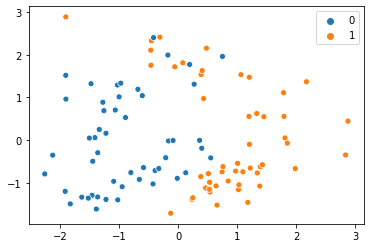

In [5]:
sns.scatterplot(X[:,0], X[:,1], hue=y);

## Splitting Data with Scikit Learn

Splitting Data into a **training-dataset** and a **testing-dataset**.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

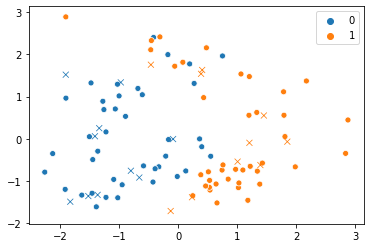

In [7]:
sns.scatterplot(X_train[:,0], X_train[:,1], marker='o', hue=y_train)
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='x', legend=False);

## Splitting Data with Pytorch

Splitting Data into a **training-dataset** and a **testing-dataset**.

In [8]:
from sklearn.datasets import make_classification
import torch
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataset import random_split
np.random.seed(31415)

features, targets = make_classification(n_features=2, n_redundant=0, n_informative=2)
dataset = TensorDataset(torch.tensor(features), torch.tensor(targets))
train_datasubset, test_datasubset = random_split(dataset, [80, 20])

X_train, y_train = train_datasubset.dataset.tensors
X_test, y_test = test_datasubset.dataset.tensors

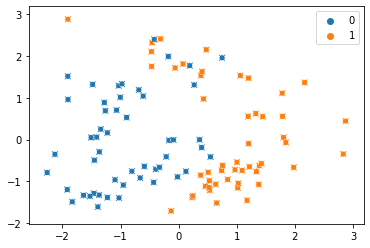

In [25]:
plt.clf()
sns.scatterplot(X_train[:,0], X_train[:,1], marker='o', hue=y_train)
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, marker='x', legend=False);

## Pytorch Dataloader with Scikit Data

In [14]:
from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset
import torch

features, targets = make_classification()
dataset = TensorDataset(torch.tensor(features), torch.tensor(targets))
dataloader = DataLoader(dataset, batch_size=25)

batch with 25 items
batch with 25 items
batch with 25 items
batch with 25 items


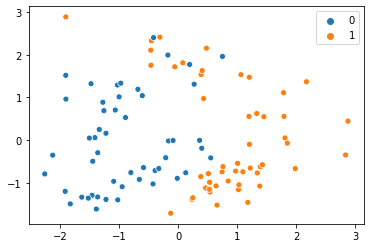

In [23]:
for X, y in dataloader:
    print(f'batch with {len(X)} items')
    plt.clf()
    sns.scatterplot(X_train[:,0], X_train[:,1], hue=y_train)